# notebook 01: trajectory plotting
In this notebook we read in trajectory data of example participants, plot trajectories and endpoints separated by condition to generate Figures 1, 2, 3, S1, and the exemplary participants a-f in Figure 7 of the paper.

In [8]:
# importing python packages
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
# importing modules from our analysis pipeline
from utilities import helpers
from utilities import plot_utilities

First we read in the settingsfile of the virtual reality experiment that holds the homing start and end position, waypoint positions, and object positions. We also set the data path and save path.

In [11]:
data_root = f"..{os.sep}data{os.sep}"
save_path = f"..{os.sep}figures{os.sep}"
settingsfile = helpers.create_trial_settings_dict_from_session_json(data_root + "experiment_settingsfile.json")
# if save path does not exist, make it 
if not os.path.exists(save_path):
    os.mkdir(save_path)

#### get participants' plotting color from performance

Here we rank participants by their performance in the 99 object condition and assign colors to their identification codes.

In [12]:
# prepare different plotting colors for participants
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
ID_color_dict = performance["color_dict"]
ppid_colormap = performance["colormap"]

In [13]:
# read in experiment result dataframe
experiment_results = pd.read_csv(data_root + "processed_data.csv")

## Figure 1

#### plot object positions in full extent with color coding for different conditions
Here we only plot the conditions with their objects and waypoints a well as the homing position. We don't plot any trajectories or endpoints.

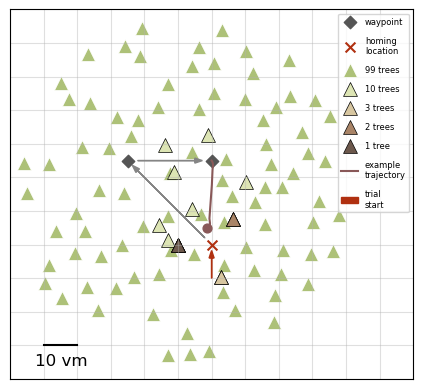

In [24]:
# define conditions and colors
conditions = ["99_obj_right", "10_obj_right", "3_obj_right", "2_obj_right", "1_obj_right"]
colors = ["#adc178","#dde5b4","#D7C6A0","#a98467","#6c584c"]
labels = ["99 trees", "10 trees", "3 trees", "2 trees", "1 tree"]

waypoint_positions = helpers.get_object_positions_for_condition(settingsfile, conditions[0], object_type="WaypointPositions")

# define example trajectory
ID = "MM04_PU11"
session = 2
trial = 20

# load example trajectory data
trajectories_path = data_root + "trajectories{separator}processed{separator}traj_player_{placeholder}.csv"
trajectories_path = trajectories_path.format(separator = os.sep, placeholder="{}")
df_play = pd.read_csv(trajectories_path.format(ID))
example_trajectory = df_play.query(f"session_num=={session} and trial_num=={trial} and trial_state=='Homing'")

# find participant plot color
plot_color = ID_color_dict[ID]

fig, ax = plt.subplots()
ax.arrow(x=-2, y=2, dx=-20, dy=20, color="#858585", head_width=1.5, linewidth=1, zorder=100)
ax.arrow(x=-22, y=25, dx=17, dy=0, color="#858585", head_width=1.5, linewidth=1, zorder=100)

# plot waypoints
ax.scatter(waypoint_positions.X, waypoint_positions.Y, s=40, marker="D", color="#555555", label="waypoint", zorder=100)
ax.scatter(0, 0, s=50, marker="x", color="#b03010", label="homing\nlocation", zorder=100)
for c, condition, l in zip(colors, conditions, labels):
    landmark_positions = helpers.get_object_positions_for_condition(settingsfile, condition, object_type="LandmarkPositions")
    if condition == "99_obj_right":
        edgecolor = "white"
    else:
        edgecolor = "black"
    ax.scatter(landmark_positions.X, landmark_positions.Y, s=100, marker="^", color=c, label=l, zorder=1, edgecolors=edgecolor, linewidth=0.5)
# plot example trajectory
ax.plot(example_trajectory.pos_x, example_trajectory.pos_z, linewidth=1.5, color=plot_color, zorder=100, label="example\ntrajectory")
ax.scatter(example_trajectory.pos_x.iloc[-1], example_trajectory.pos_z.iloc[-1], s=40, color=plot_color, zorder=100)   
# plot arrow from start position to campfire
ax.arrow(x=0, y=-10, dx=0, dy=6, linewidth=1, zorder=100, color="#b03010", head_width=1.5, label="trial\nstart")

xticks = np.arange(-60, 61, 10)
yticks = np.arange(-40, 71, 10)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
#ax.set_xticklabels(["", "-50", "", "", "", "", "0", "", "", "", "", "50", ""])
#ax.set_yticklabels(["-40", "", "", "", "0", "", "", "", "", "50", "", ""])
ax.set_xlim([min(xticks), max(xticks)])
ax.set_ylim([min(yticks), max(yticks)])
ax.set_aspect("equal", "box")
ax.grid(visible=True, axis="both", alpha=0.4)
ax.legend(fontsize=6, labelspacing=1.2)
ax.tick_params(
    axis='both',         
    which='both',     
    bottom=False,     
    top=False,        
    left=False,
    labelbottom=False,
    labelleft=False)
ax.plot([xticks[1],xticks[2]], [yticks[1],yticks[1]], color="black")
ax.text(x=xticks[1]*1.05, y=yticks[1]*1.2, s="10 vm", color="black", fontsize=12)
# save figure as svg and png in save path
filename = "figure_1a.{}"
fig.savefig(save_path + filename.format("svg"))
fig.savefig(save_path + filename.format("png"))
fig.savefig(save_path + filename.format("pdf"))
fig.savefig(save_path + filename.format("tiff"))

## Figure 2

Now we use the function "create_traj_plots" with the parameter settings underneath to generate Figure 2 of the paper. Please see the function's source code in utilities/plot_utilities for details.

Figure 2a shows data of participant "MM04_PU07" and Figure 2b data of "MM04_PU11". 

To generate subplots a-f in Figure 7 use participant IDs 
a: "MM04_PU13", b:"MM04_PU25", c: "MM04_PU24", d: "MM04_PU01", e: "MM04_PU03", f: "MM04_PU11"

#### Figure 2a

...preparing figure panels for different conditions...
...plotting all trajectories and endpoints...
You can find the full size version of the figure in ..\figures\ as figure_2b.{}
double-click the figure for full-size view


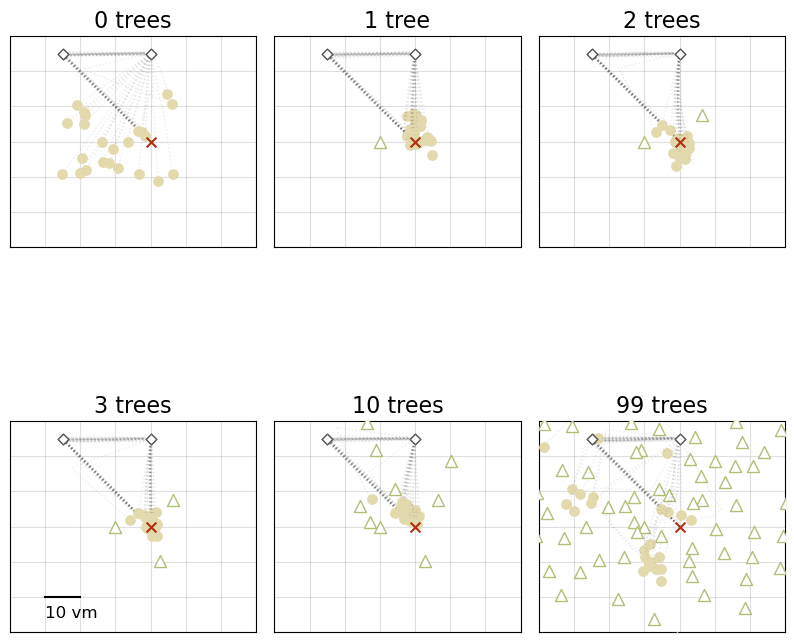

In [7]:
# set participant
ID = "MM04_PU07" # this is the participant's identification code for the example data in the paper

# set desired axis ticks and labels
xticks = np.arange(-30, 21, 10)
yticks = np.arange(-20, 31, 10)
xticklabels = ["", "", "", "", "", ""]
yticklabels = ["", "", "", "", "", ""]

# find participant plot color
plot_color = ID_color_dict[ID]

# set path for trajectories data that only needs to be formatted
trajectories_path = data_root + "trajectories{separator}processed{separator}traj_player_{placeholder}.csv"
trajectories_path = trajectories_path.format(separator = os.sep, placeholder="{}")

# set titles of subplots
subplot_titles=["0 trees", "1 tree", "2 trees", "3 trees", "10 trees", "99 trees"]

# set desired axis ticks and labels
xticks = np.arange(-40, 31, 10)
yticks = np.arange(-30, 31, 10)

# create trajectory plots
fig, axs = plot_utilities.create_traj_plots(
    trajectories_path = trajectories_path,
    IDs=ID,
    settingsdict=settingsfile,
    pool_IDs=False,
    ID_colors=[plot_color],
    subplot_titles=subplot_titles,
    xticks=xticks,
    xticklabels=xticklabels,
    yticks=yticks,
    yticklabels=yticklabels,
)

# set figure size
fig.set_size_inches(10,10)
plt.subplots_adjust(wspace=0.075, hspace=0)
# add scale bar to bottom left plot
axs[1,0].plot([xticks[1],xticks[2]], [yticks[1],yticks[1]], color="black")
axs[1,0].text(x=xticks[1], y=yticks[1]*1.3, s="10 vm", color="black", fontsize=12)
# save figure as svg and png in save path
filename = "figure_2b.{}"
fig.savefig(save_path + filename.format("svg"))
fig.savefig(save_path + filename.format("png"))
fig.savefig(save_path + filename.format("pdf"))
fig.savefig(save_path + filename.format("tiff"))
print(f"You can find the full size version of the figure in {save_path} as {filename}")
print("double-click the figure for full-size view")

#### Figure 2b

...preparing figure panels for different conditions...
...plotting all trajectories and endpoints...
You can find the full size version of the figure in ..\figures\ as figure_2a.{}
double-click the figure for full-size view


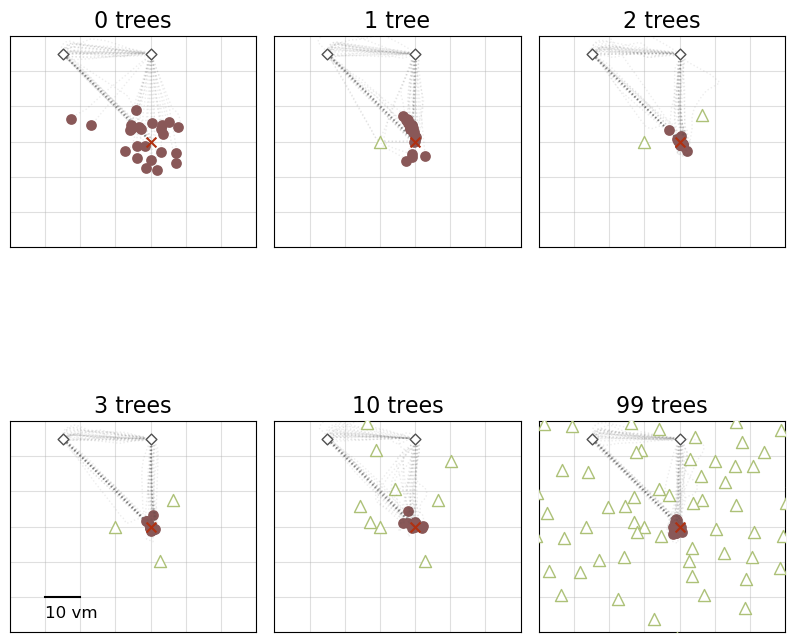

In [8]:
# set participant
ID = "MM04_PU11" # this is the participant's identification code for the example data in the paper

# set desired axis ticks and labels
xticks = np.arange(-30, 21, 10)
yticks = np.arange(-20, 31, 10)
xticklabels = ["", "", "", "", "", ""]
yticklabels = ["", "", "", "", "", ""]

# find participant plot color
plot_color = ID_color_dict[ID]

# set path for trajectories data that only needs to be formatted
trajectories_path = data_root + "trajectories{separator}processed{separator}traj_player_{placeholder}.csv"
trajectories_path = trajectories_path.format(separator = os.sep, placeholder="{}")

# set titles of subplots
subplot_titles=["0 trees", "1 tree", "2 trees", "3 trees", "10 trees", "99 trees"]

# set desired axis ticks and labels
xticks = np.arange(-40, 31, 10)
yticks = np.arange(-30, 31, 10)

# create trajectory plots
fig, axs = plot_utilities.create_traj_plots(
    trajectories_path = trajectories_path,
    IDs=ID,
    settingsdict=settingsfile,
    pool_IDs=False,
    ID_colors=[plot_color],
    subplot_titles=subplot_titles,
    xticks=xticks,
    xticklabels=xticklabels,
    yticks=yticks,
    yticklabels=yticklabels,
)

# set figure size
fig.set_size_inches(10,10)
plt.subplots_adjust(wspace=0.075, hspace=0)
# add scale bar to bottom left plot
axs[1,0].plot([xticks[1],xticks[2]], [yticks[1],yticks[1]], color="black")
axs[1,0].text(x=xticks[1], y=yticks[1]*1.3, s="10 vm", color="black", fontsize=12)
# save figure as svg and png in save path
filename = "figure_2a.{}"
fig.savefig(save_path + filename.format("svg"))
fig.savefig(save_path + filename.format("png"))
fig.savefig(save_path + filename.format("pdf"))
fig.savefig(save_path + filename.format("tiff"))
print(f"You can find the full size version of the figure in {save_path} as {filename}")
print("double-click the figure for full-size view")

## Figure 3

Now we use the same function "create_traj_plots" with different parameter settings to generate Figure 3 of the paper. Please see the function's source code in utilities/plot_utilities for details.

#### plot trajctories for all participants

... and use color coding defined above

...preparing figure panels for different conditions...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajector

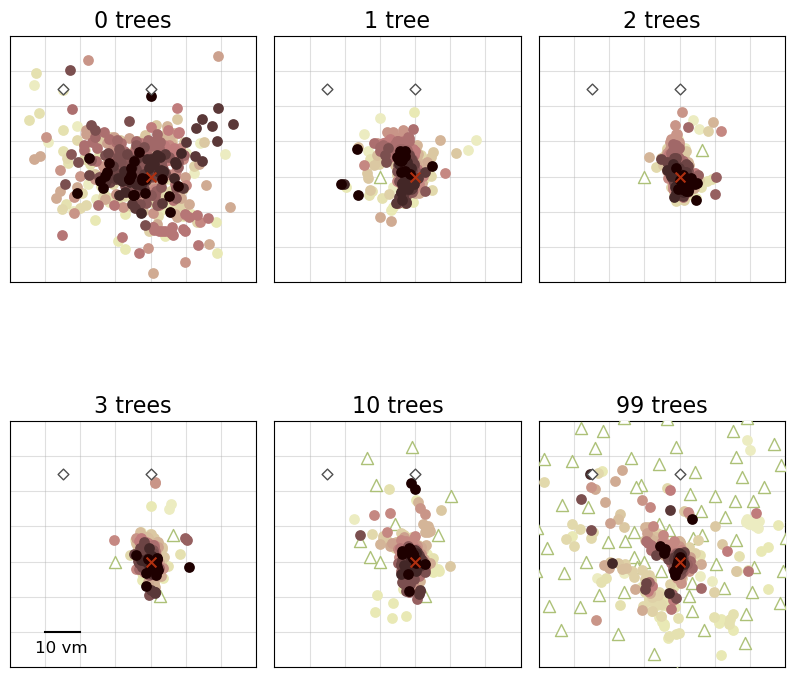

In [9]:
# get list of all participant IDs
experiment_results = pd.read_csv(data_root + "processed_data.csv")
IDs = np.unique(experiment_results["ppid"])

# get performance dict to scatter the participants from bad to good
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
performance_dict = performance["performance_dict"]
IDs = [i for i in reversed(list(performance_dict.keys()))]
# get array with plot colors according to list of IDs
ID_colors = [ID_color_dict[ID] for ID in IDs]

# set path for trajectories data that only needs to be formatted
trajectories_path = trajectories_path = data_root + "trajectories{separator}processed{separator}traj_player_{ID_placeholder}.csv"
trajectories_path = trajectories_path.format(separator = os.sep, ID_placeholder="{}")

# set titles of subplots
subplot_titles=["0 trees", "1 tree", "2 trees", "3 trees", "10 trees", "99 trees"]

# set desired axis ticks and labels
xticks = np.arange(-40, 31, 10)
yticks = np.arange(-30, 41, 10)
xticklabels = ["-40", "", "", "", "0", "", "", "30"]
yticklabels = ["-30", "", "", "0", "", "", "", "40"]

# create trajectory plots
fig, axs = plot_utilities.create_traj_plots(
    trajectories_path = trajectories_path,
    IDs=IDs,
    settingsdict=settingsfile,
    pool_IDs=True,
    ID_colors=ID_colors,
    plot_trajectories=False,
    subplot_titles=subplot_titles,
    xticks=xticks,
    xticklabels=xticklabels,
    yticks=yticks,
    yticklabels=yticklabels,
)

# set figure size
fig.set_size_inches(10,10)
plt.subplots_adjust(wspace=0.075, hspace=0)
# add scale bar to bottom left plot
axs[1,0].plot([xticks[1],xticks[2]], [yticks[1],yticks[1]], color="black")
axs[1,0].text(x=xticks[1]*1.1, y=yticks[1]*1.3, s="10 vm", color="black", fontsize=12)
# save figure as svg and png in save path
filename = "figure_3.{}"
fig.savefig(save_path + filename.format("svg"))
fig.savefig(save_path + filename.format("png"))
fig.savefig(save_path + filename.format("pdf"))
fig.savefig(save_path + filename.format("tiff"))
print(f"You can find the full size version of the figure in {save_path} as {filename}")
print("double-click the figure for full-size view")

## Figure S1

Now we use the same function "create_traj_plots" with different parameter settings to generate Figure S1 of the paper. Please see the function's source code in utilities/plot_utilities for details.

...preparing figure panels for different conditions...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajectories and endpoints...
...plotting all trajector

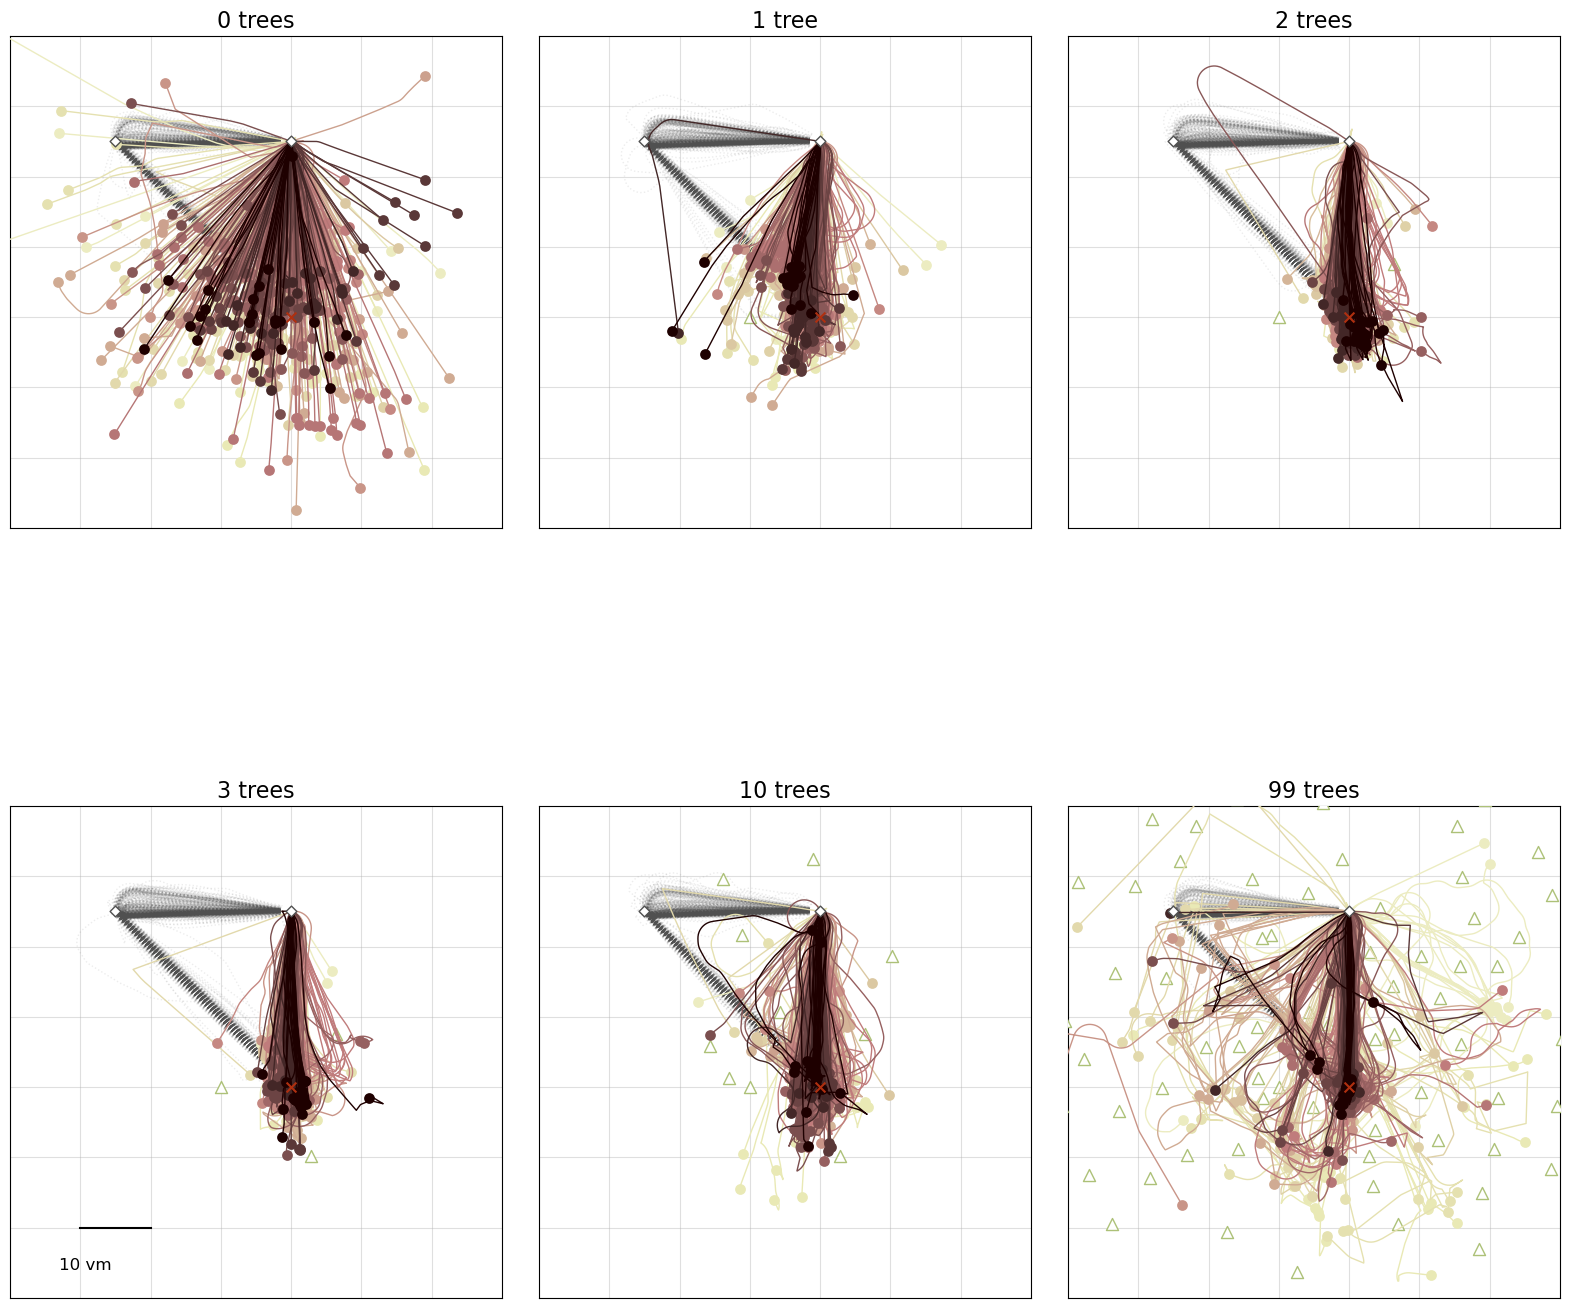

In [10]:
# get list of all participant IDs
experiment_results = pd.read_csv(data_root + "processed_data.csv")
IDs = np.unique(experiment_results["ppid"])

# get performance dict to scatter the participants from bad to good
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
performance_dict = performance["performance_dict"]
IDs = [i for i in reversed(list(performance_dict.keys()))]

# get array with plot colors according to list of IDs
ID_colors = [ID_color_dict[ID] for ID in IDs]

# set path for trajectories data that only needs to be formatted
trajectories_path = trajectories_path = data_root + "trajectories{separator}processed{separator}traj_player_{ID_placeholder}.csv"
trajectories_path = trajectories_path.format(separator = os.sep, ID_placeholder="{}")

# set titles of subplots
subplot_titles=["0 trees", "1 tree", "2 trees", "3 trees", "10 trees", "99 trees"]

# set desired axis ticks and labels
xticks = np.arange(-40, 31, 10)
yticks = np.arange(-30, 41, 10)
xticklabels = ["-40", "", "", "", "0", "", "", "30"]
yticklabels = ["-30", "", "", "0", "", "", "", "40"]

# create trajectory plots
fig, axs = plot_utilities.create_traj_plots(
    trajectories_path = trajectories_path,
    IDs=IDs,
    settingsdict=settingsfile,
    pool_IDs=True,
    ID_colors=ID_colors,
    plot_trajectories=True,
    colored_trajectories=True,
    subplot_titles=subplot_titles,
    xticks=xticks,
    xticklabels=xticklabels,
    yticks=yticks,
    yticklabels=yticklabels,
)

# set figure size
fig.set_size_inches(20,20)
plt.subplots_adjust(wspace=0.075, hspace=0)
# add scale bar to bottom left plot
axs[1,0].plot([xticks[1],xticks[2]], [yticks[1],yticks[1]], color="black")
axs[1,0].text(x=xticks[1]*1.1, y=yticks[1]*1.3, s="10 vm", color="black", fontsize=12)
# save figure as svg and png in save path
filename = "figure_S1.{}"
fig.savefig(save_path + filename.format("svg"))
fig.savefig(save_path + filename.format("png"))
fig.savefig(save_path + filename.format("pdf"))
fig.savefig(save_path + filename.format("tiff"))
print(f"You can find the full size version of the figure in {save_path} as {filename}")
print("double-click the figure for full-size view")